<a href="https://colab.research.google.com/github/vedanth-aggarwal/waste_segregation_ml/blob/main/trashdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets # download from kaggle
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/farzadnekouei/trash-type-image-dataset/data' # url
od.download(dataset_url)

## {"username":"vedanthaggarwal","key":"c868f308d5ea632cd9181796a112e745"}

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vedanthaggarwal
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/farzadnekouei/trash-type-image-dataset


100%|██████████| 40.9M/40.9M [00:00<00:00, 97.5MB/s]


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('dataset/images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

dataset/images/cardboard/cardboard_353.jpg
dataset/images/cardboard/cardboard_003.jpg
dataset/images/cardboard/cardboard_335.jpg
dataset/images/cardboard/cardboard_366.jpg
dataset/images/cardboard/cardboard_395.jpg
dataset/images/cardboard/cardboard_187.jpg
dataset/images/cardboard/cardboard_067.jpg
dataset/images/cardboard/cardboard_113.jpg
dataset/images/cardboard/cardboard_076.jpg
dataset/images/cardboard/cardboard_275.jpg
dataset/images/cardboard/cardboard_383.jpg
dataset/images/cardboard/cardboard_389.jpg
dataset/images/cardboard/cardboard_031.jpg
dataset/images/cardboard/cardboard_083.jpg
dataset/images/cardboard/cardboard_282.jpg
dataset/images/cardboard/cardboard_150.jpg
dataset/images/cardboard/cardboard_022.jpg
dataset/images/cardboard/cardboard_328.jpg
dataset/images/cardboard/cardboard_295.jpg
dataset/images/cardboard/cardboard_329.jpg
dataset/images/cardboard/cardboard_007.jpg
dataset/images/cardboard/cardboard_165.jpg
dataset/images/cardboard/cardboard_348.jpg
dataset/ima

In [ ]:
data_path = 'dataset/images'
# Data Classes
print(os.listdir(data_path))

['cardboard', 'glass', 'paper', 'trash', 'plastic', 'metal']


In [ ]:
%pip install tensorflow

In [ ]:
%pip install tensorflow
import tensorflow # google - machine learning
import os
import warnings
import numpy as np
import pandas as pd # converting table
import matplotlib.pyplot as plt # visualization
import tensorflow as tf
import tensorflow.keras.utils as utils
from   tensorflow.keras.preprocessing.image import ImageDataGenerator # loading the data
from   tensorflow.keras.models import Sequential
from   tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, ZeroPadding2D # machine learning layers
from   tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from   tensorflow.keras.utils import plot_model
from   tensorflow.keras.callbacks import ModelCheckpoint
from   pathlib import Path
from   tensorflow.keras import models, layers, optimizers
from   sklearn.utils.class_weight import compute_class_weight

In [ ]:
#warnings.filterwarnings("ignore")

In [ ]:

# Data Classes
print(os.listdir(data_path))

['cardboard', 'glass', 'paper', 'metal', 'trash', 'plastic']


In [ ]:
# Show five image of each class
def plot_imgs(item_dir, top=10):
    items  = os.listdir(item_dir) #
    item_files = [os.path.join(item_dir, file) for file in items][:5] # top 5 image directories (cardboad_125.jpj)

    plt.figure(figsize=(10, 10)) # figure ( 20,20 , 30,30)

    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1) # small plot for each image
        img = plt.imread(img_path) # reading filedirectory and loading the actual image
        plt.imshow(img) # image show
        #plt.axis('off')
        plt.title(os.path.basename(item_dir))

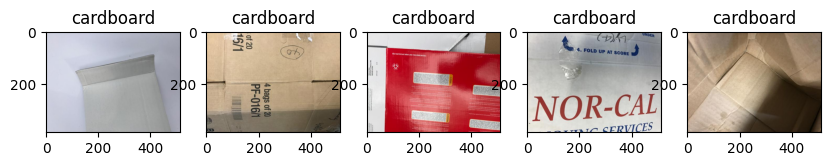

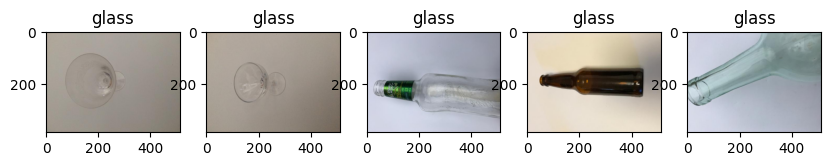

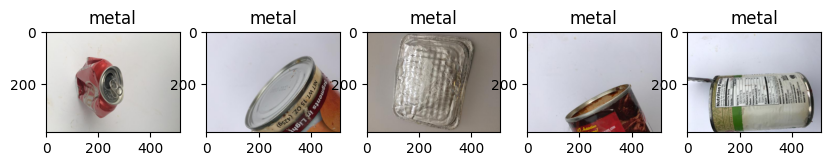

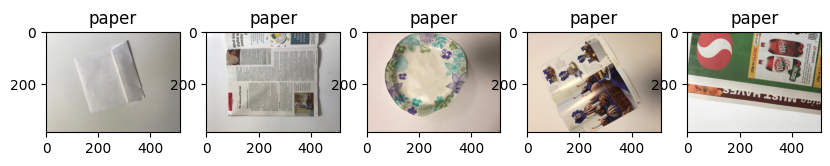

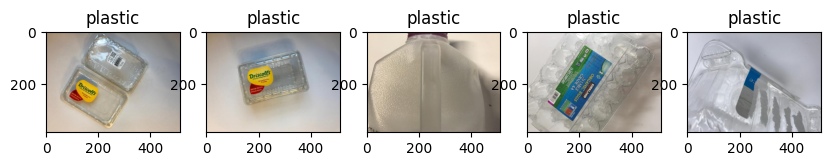

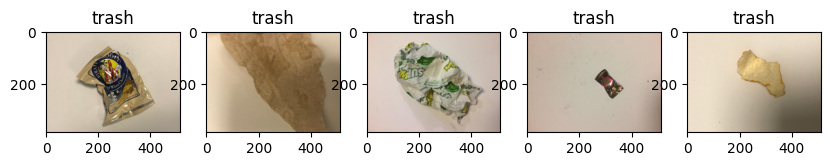

In [ ]:
data_path = 'dataset/images'
plot_imgs(data_path+'/cardboard')
plot_imgs(data_path+'/glass')
plot_imgs(data_path+'/metal')
plot_imgs(data_path+'/paper')
plot_imgs(data_path+'/plastic')
plot_imgs(data_path+'/trash')

# Data Loading

In [ ]:
# Define variable for requirements
batch_size = 32 # too many images in memory so treat in batches
target_size = (180, 180) # image height and width
validation_split = 0.15 # training and testing data concept

'''
1. Training phase - learning textbooks, learning online materials
#2. Validation phase - mock test, practice tests
3. Testing phase - which is the final exam

'''
# Data Generators
train_img_generator = ImageDataGenerator(rescale=1./255, # machine like values between 0 and 1 ( colors/255 )
                                         validation_split=validation_split,

                                        )

test_data_img_generator = ImageDataGenerator(rescale=1./255,
                                             validation_split=validation_split
                                            )

 #horizontal_flip=True,
                                         #vertical_flip=True,
                                         #zoom_range = 0.2,
                                         #width_shift_range = 0.2,
                                         #height_shift_range = 0.2,
                                         #rotation_range=20,
                                         #shear_range = 0.2,
                                         #fill_mode='nearest'

In [ ]:
# Separate train Data
train_data = train_img_generator.flow_from_directory(data_path,
                                                        subset="training",
                                                        seed=133, # randomizing
                                                        target_size=target_size,
                                                        batch_size=batch_size,
                                                        class_mode='categorical',
                                                        color_mode='rgb',
                                                       )

Found 2150 images belonging to 6 classes.


In [ ]:
# Separate validation Data
test_data = test_data_img_generator.flow_from_directory(data_path,
                                                        subset="validation",
                                                        seed=133,
                                                        target_size=target_size,
                                                        batch_size=batch_size,
                                                        class_mode='categorical',
                                                        color_mode='rgb',
                                                       )

Found 377 images belonging to 6 classes.


# Building the actual model


In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
# sequentially use layers

# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

model = Sequential([ # step by step
  Conv2D(10, 3, activation='relu', input_shape=(180, 180, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'), # curves
  MaxPool2D(),
  Flatten(), # image is 2 dimensional 1 dimensional
  Dense(6, activation='softmax') # probability distribution [0.2,0.4,0.5]
])

# images have rows and columns - glass
# Compile model (same as model_4)
model.compile(loss='categorical_crossentropy', optimizer=Adam(),
                metrics=['accuracy'])

# what is the equivalent of guessing ?

# Fit the model
history = model.fit(train_data,
                    epochs=10) # running for longer improves model

Epoch 1/10
68/68 [==============================] - 5s 51ms/step - loss: 1.5981 - accuracy: 0.3405
Epoch 2/10
68/68 [==============================] - 4s 54ms/step - loss: 1.3517 - accuracy: 0.4679
Epoch 3/10
68/68 [==============================] - 4s 64ms/step - loss: 1.2369 - accuracy: 0.5093
Epoch 4/10
68/68 [==============================] - 4s 57ms/step - loss: 1.1332 - accuracy: 0.5740
Epoch 5/10
68/68 [==============================] - 4s 55ms/step - loss: 1.0636 - accuracy: 0.5944
Epoch 6/10
68/68 [==============================] - 4s 52ms/step - loss: 0.9619 - accuracy: 0.6400
Epoch 7/10
68/68 [==============================] - 4s 53ms/step - loss: 0.9671 - accuracy: 0.6363
Epoch 8/10
68/68 [==============================] - 5s 68ms/step - loss: 0.8340 - accuracy: 0.6912
Epoch 9/10
68/68 [==============================] - 4s 55ms/step - loss: 0.7830 - accuracy: 0.7065
Epoch 10/10
68/68 [==============================] - 4s 51ms/step - loss: 0.7198 - accuracy: 0.7400


In [ ]:
'''
Sequential:
- The `Sequential` model is a linear stack of layers. This means that each layer has exactly one input tensor and one output tensor.
a -> b -> c
Layers

1. Conv2D(10, 3, activation='relu', input_shape=(180, 180, 3)):
   - Images are 2 dimensional -  This is a 2D convolutional layer, which applies convolution operations to the input data.
   - 10 - This specifies the number of filters (also called kernels) in the convolution operation. Each filter detects different features in the input image.
   - 3 -  This is the kernel size, meaning each filter is 3x3 pixels.
   - activation='relu': ( images have curved lines ) This specifies the Rectified Linear Unit (ReLU) activation function, which introduces non-linearity to the model by converting all negative values to zero.
   - **input_shape=(180, 180, 3):** This defines the shape of the input data. In this case, the input images are 180x180 pixels with 3 color channels (RGB).

2. **MaxPool2D(pool_size=2):**
   - **MaxPool2D:** This is a max pooling layer, which reduces the spatial dimensions (height and width) of the input by taking the maximum value over a pool size.
   - **pool_size=2:** This means that the pooling operation will be applied over a 2x2 window, effectively reducing each dimension by half.

3. **Conv2D(10, 3, activation='relu'):**
   - Similar to the first convolutional layer, but without specifying the input shape since it's automatically inferred from the previous layer.

4. **MaxPool2D():**
   - Another max pooling layer with the default pool size of 2x2.

5. **Conv2D(10, 3, activation='relu'):**
   - Another convolutional layer with the same parameters as the previous ones.

6. **MaxPool2D():**
   - Another max pooling layer.

7. **Flatten():**
   - This layer flattens the input, converting the 2D matrix of features into a 1D vector. This is necessary before passing the data to fully connected (Dense) layers.

8. **Dense(6, activation='softmax'):**
   - **Dense:** This is a fully connected layer where each neuron is connected to every neuron in the previous layer.
   - **6:** This specifies the number of output neurons. This is typically the number of classes in a classification problem.
   - **activation='softmax':** This activation function is used for multi-class classification problems. It converts the raw output of each neuron into a probability distribution over the classes, where the sum of all probabilities is 1.
   - probabibility distribution

### Model Compilation
- **model.compile():** This method configures the model for training.
  - **loss='categorical_crossentropy':** This is the loss function used for multi-class classification problems where each sample belongs to exactly one class.
  - **optimizer=Adam():** This specifies the Adam optimizer, an adaptive learning rate optimization algorithm.
  - **metrics=['accuracy']:** This specifies that the accuracy metric should be calculated during training and evaluation.
'''

In [ ]:
model.evaluate(test_data) # overfitting concept

12/12 [==============================] - 1s 78ms/step - loss: 1.1181 - accuracy: 0.5650


[1.1181315183639526, 0.5649867653846741]

In [ ]:
# Accuracy on train data :
accuracy = history.history['categorical_accuracy']

# Accuracy on test data :
#val_accuracy = history.history['val_categorical_accuracy']
epochs = range(1, len(accuracy) + 1)  # Epochs

# Accuracy line plot :
plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy, 'b', label='train accuracy')
#plt.plot(epochs, val_accuracy, 'r', label='test accuracy')
plt.title('Accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend();

KeyError: 'categorical_accuracy'

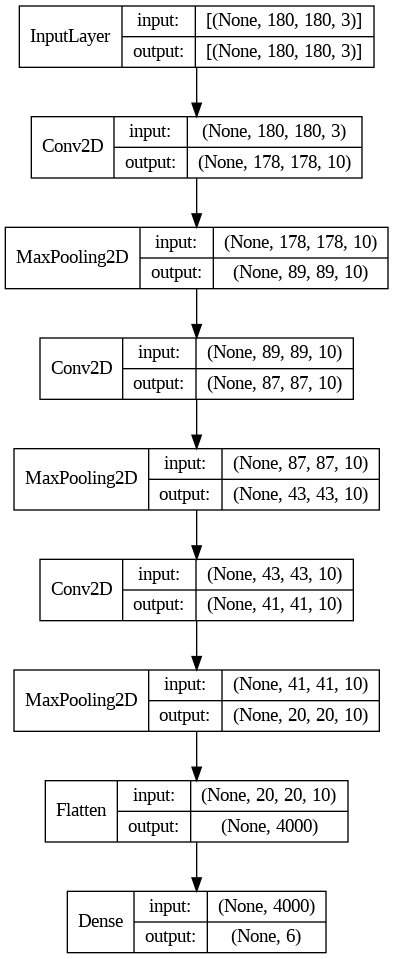

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=False)

In [ ]:
import numpy as np
from PIL import Image
import tensorflow as tf

def preprocess_image_from_file(file_path, target_size=(180, 180)):

    image = Image.open(file_path) # open
    image = image.resize(target_size) # resize
    image_array = np.array(image) # array [0,2,3,4,4]

    # images are actually just arrays of data like a grid of rgb values

    # Normalize pixel values to be between 0 and 1
    image_array = image_array / 255.0 # ( 0 - 255) - 0 and 1

    # Add a batch dimension - (0,180,180,3)
    image_array = np.expand_dims(image_array, axis=0) # batch size dimension (0,180,180,3) - axis=0 is row

    return image_array

def make_prediction(file_path, model):
    labels = ['CARDBOARD','GLASS','METAL','PAPER','PLASTIC','TRASH']
    # [[0.13357177 0.30102324 0.11177049 0.15298232 0.2326166  0.06803551]]
    preprocessed_image = preprocess_image_from_file(file_path)
    prediction = model.predict(preprocessed_image)
    print(prediction)
    prediction = labels[np.argmax(prediction)]

    return prediction

# Example usage:
# Load your trained model (ensure the model is in the same directory or provide the correct path)
#model = tf.keras.models.load_model('path_to_your_model.h5')

# Path to the local image file
image_path = 'dataset/images/glass/glass_001.jpg'

# Make a prediction
prediction = make_prediction(image_path, model)
print(prediction)


1/1 [==============================] - 0s 19ms/step
[[0.00650017 0.0221004  0.09293918 0.862956   0.01127217 0.00423199]]
PAPER


In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#https://poloclub.github.io/cnn-explainer/

In [ ]:
ES = EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [ ]:
RLROP = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.1, min_lr=0.01)

In [ ]:
MCH = ModelCheckpoint('trash.keras', monitor='val_loss', mode='min', save_best_only=True)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()]
             )

In [ ]:
history = model.fit(train_data,
                    steps_per_epoch=len(train_data),
                    epochs=500,
                    validation_data=test_data,
                    validation_steps=len(test_data),
                    callbacks=[ES, RLROP, MCH]
                   )

Epoch 1/500
 2/72 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - categorical_accuracy: 0.1000 - loss: 2.6647  

I0000 00:00:1716382965.943487      92 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1716382965.962254      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step - categorical_accuracy: 0.2073 - loss: 2.0832

W0000 00:00:1716383001.689156      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


72/72 ━━━━━━━━━━━━━━━━━━━━ 58s 559ms/step - categorical_accuracy: 0.2088 - loss: 2.0748 - val_categorical_accuracy: 0.3316 - val_loss: 1.6240 - learning_rate: 0.0010
Epoch 2/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_categorical_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 22s 284ms/step - categorical_accuracy: 0.3044 - loss: 1.5971 - val_categorical_accuracy: 0.3899 - val_loss: 1.5814 - learning_rate: 0.0010
Epoch 4/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step - categorical_accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_categorical_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 22s 277ms/step - categorical_accuracy: 0.3687 - loss: 1.5258 - val_categorical_accuracy: 0.3316 - val_loss: 1.5459 - learning_rate: 0.0010
Epoch 6/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 160us/step - categorical_accuracy: 0.0000e+00 - loss

In [ ]:
best_score = max(history.history['val_categorical_accuracy'] )
print(f"Best Validation score is: {best_score}")

Best Validation score is: 0.4615384638309479


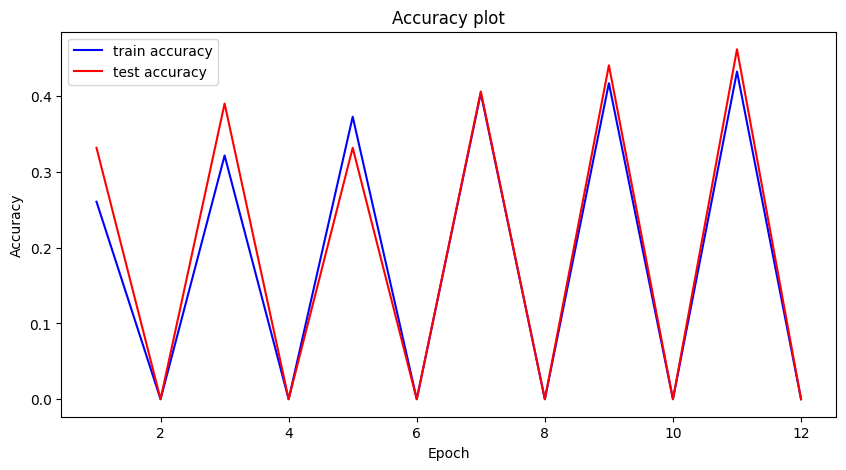

In [ ]:
# Accuracy on train data :
accuracy = history.history['categorical_accuracy']

# Accuracy on test data :
val_accuracy = history.history['val_categorical_accuracy']
epochs = range(1, len(accuracy) + 1)  # Epochs

# Accuracy line plot :
plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy, 'b', label='train accuracy')
plt.plot(epochs, val_accuracy, 'r', label='test accuracy')
plt.title('Accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend();

In [ ]:
classes = train_data.class_indices
classes

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

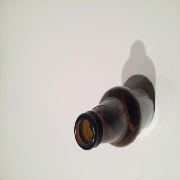

In [ ]:
img = utils.load_img(
    '/kaggle/input/trash-type-image-dataset/TrashType_Image_Dataset/glass/glass_001.jpg',
    color_mode='rgb',
    target_size=(180, 180),
    interpolation='nearest',
    keep_aspect_ratio=False
)

img

In [ ]:
img = utils.img_to_array(img)
img = img / 255.0    # Normalize the image

result = model.predict(tf.expand_dims(img, axis=0))

classes = train_data.class_indices

for key, value in classes.items():
    if value == np.argmax(result):
        print(key)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
glass
